Initialize Sentiment Analyzer

In [1]:
import nltk
import warnings
warnings.filterwarnings('ignore')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

Updating Vader Lexicon with External Lexicon

In [2]:
# import csv
# import pandas as pd

# # stock market lexicon
# stock_lex = pd.read_csv('lexicon_data/stock_lex.csv')
# stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
# stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
# stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}
# stock_lex_scaled = {}
# for k, v in stock_lex.items():
#     if v > 0:
#         stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
#     else:
#         stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

# # # Loughran and McDonald
# # positive = []
# # with open('lexicon_data/lm_positive.csv', 'r') as f:
# #     reader = csv.reader(f)
# #     for row in reader:
# #         positive.append(row[0].strip())
    
# # negative = []
# # with open('lexicon_data/lm_negative.csv', 'r') as f:
# #     reader = csv.reader(f)
# #     for row in reader:
# #         entry = row[0].strip().split(" ")
# #         if len(entry) > 1:
# #             negative.extend(entry)
# #         else:
# #             negative.append(entry[0])

# final_lex = {}
# # final_lex.update({word:2.0 for word in positive})
# # final_lex.update({word:-2.0 for word in negative})
# final_lex.update(stock_lex_scaled)
# final_lex.update(sia.lexicon)
# sia.lexicon = final_lex

Scraping FB posts from Business Times

In [3]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
from datetime import datetime, timedelta
import time
import pprint

date_sentiments = {}

for i in range(1,11):
    page = urlopen('https://www.businesstimes.com.sg/search/facebook?page='+str(i)).read()
    soup = BeautifulSoup(page, features="html.parser")
    posts = soup.findAll("div", {"class": "media-body"})
    for post in posts:
        time.sleep(1)
        url = post.a['href']
        date = post.time.text
        print(date, url)
        try:
            link_page = urlopen(url).read()
        except:
            url = url[:-2]
            link_page = urlopen(url).read()
        link_soup = BeautifulSoup(link_page)
        sentences = link_soup.findAll("p")
        passage = ""
        for sentence in sentences:
            passage += sentence.text
#         print(passage)
        sentiment = sia.polarity_scores(passage)['compound']
        date_sentiments.setdefault(date, []).append(sentiment)

date_sentiment = {}

for k,v in date_sentiments.items():
    date_sentiment[datetime.strptime(k, '%d %b %Y').date() + timedelta(days=1)] = round(sum(v)/float(len(v)),3)

earliest_date = min(date_sentiment.keys())

print(date_sentiment)

05 Nov 2020 https://www.businesstimes.com.sg/technology/twitter-facebook-suspend-some-accounts-as-us-election-misinformation-spreads-online
04 Nov 2020 https://www.businesstimes.com.sg/technology/twitter-facebook-push-back-on-trumps-election-posts
03 Nov 2020 https://www.businesstimes.com.sg/technology/major-leak-sees-one-million-swedes-data-shared-with-facebook-google
30 Oct 2020 https://www.businesstimes.com.sg/technology/facebook-anticipates-tougher-2021-even-as-pandemic-boosts-ad-revenue
27 Oct 2020 https://www.businesstimes.com.sg/technology/with-new-tools-facebook-aims-to-avoid-election-fiasco-repeat
27 Oct 2020 https://www.businesstimes.com.sg/technology/facebook-takes-mobile-games-into-the-cloud
24 Oct 2020 https://www.businesstimes.com.sg/technology/facebook-twitter-ceos-to-testify-post-election-us-senate-panel
24 Oct 2020 https://www.businesstimes.com.sg/technology/us-may-file-antitrust-charges-against-facebook-as-soon-as-november-washington-post
22 Oct 2020 https://www.busin

23 Jul 2020 https://www.businesstimes.com.sg/technology/facebook-allows-users-to-broadcast-live-large-video-calls
16 Jul 2020 https://www.businesstimes.com.sg/technology/eu-court-strikes-down-eu-us-data-transfer-tool-in-facebook-case
16 Jul 2020 https://www.businesstimes.com.sg/government-economy/key-eu-data-transfer-tools-in-focus-in-facebook-schrems-clash
15 Jul 2020 https://www.businesstimes.com.sg/technology/facebook-helps-asias-richest-man-shed-dependence-on-oil
09 Jul 2020 https://www.businesstimes.com.sg/government-economy/facebook-blocks-accounts-linked-to-roger-stone-brazil-president
08 Jul 2020 https://www.businesstimes.com.sg/technology/facebook-not-doing-enough-to-fight-discrimination-audit-says
07 Jul 2020 https://www.businesstimes.com.sg/technology/facebook-google-twitter-pause-user-info-requests-from-hk-government
04 Jul 2020 https://www.businesstimes.com.sg/technology/canadas-biggest-banks-join-boycott-of-facebook-platforms
03 Jul 2020 https://www.businesstimes.com.sg/t

Algorithm

Starting Portfolio Value: 100000.00
2019-12-23, Close, 206.18
2019-12-23, BUY CREATE, 206.18
2019-12-24, BUY EXECUTED, Price: 206.30, Cost: 2063.00, Comm 2.06
2019-12-24, Close, 205.12
2019-12-26, Close, 207.79
2019-12-27, Close, 208.10
2019-12-30, Close, 204.41
2019-12-31, Close, 205.25
2020-01-02, Close, 209.78
2020-01-03, Close, 208.67
2020-01-06, Close, 212.60
2020-01-07, Close, 213.06
2020-01-08, Close, 215.22
2020-01-09, Close, 218.30
2020-01-10, Close, 218.06
2020-01-13, Close, 221.91
2020-01-14, Close, 219.06
2020-01-15, Close, 221.15
2020-01-16, Close, 221.77
2020-01-17, Close, 222.14
2020-01-21, Close, 221.44
2020-01-22, Close, 221.32
2020-01-23, Close, 219.76
2020-01-24, Close, 217.94
2020-01-27, Close, 214.87
2020-01-28, Close, 217.79
2020-01-29, Close, 223.23
2020-01-30, Close, 209.53
2020-01-31, Close, 201.91
2020-02-03, Close, 204.19
2020-02-04, Close, 209.83
2020-02-05, Close, 210.11
2020-02-06, Close, 210.85
2020-02-07, Close, 212.33
2020-02-10, Close, 213.06
2020-02-1

<IPython.core.display.Javascript object>


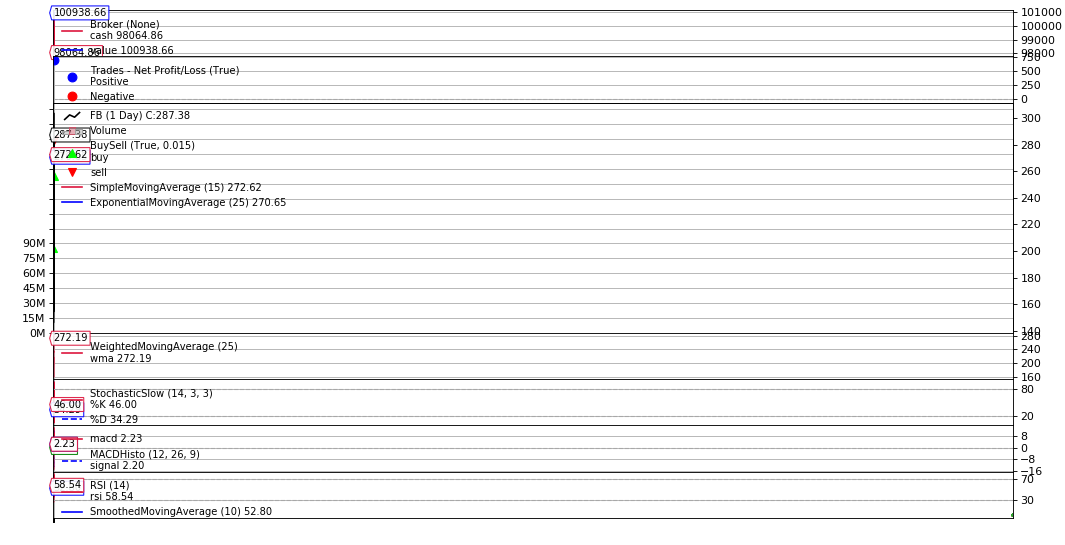

In [45]:
from __future__ import (absolute_import, division, print_function,
                            unicode_literals)
import backtrader as bt
import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
%matplotlib inline
# Create a Stratey

class Sentiment(bt.Indicator):
    lines = ('sentiment',)
    plotinfo = dict(
        plotymargin=0.15,
        plothlines=[0],
        plotyticks=[1.0, 0, -1.0])
    
    def next(self):
        self.date = self.data.datetime
        date = bt.num2date(self.date[0]).date()
        prev_sentiment = self.sentiment
        if date in date_sentiment:
            self.sentiment = date_sentiment[date]
        self.lines.sentiment[0] = self.sentiment


class TestStrategy(bt.Strategy):
    params = (
        ('period', 15),
        ('printlog', True),
    )

    def log(self, txt, dt=None, doprint=False):
        ''' Logging function for this strategy'''
        if self.params.printlog or doprint:
            dt = dt or self.datas[0].datetime.date(0)
            print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        # Keep track of pending orders
        self.order = None
        self.buyprice = None
        self.buycomm = None
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.period)
        
        bt.indicators.ExponentialMovingAverage(self.datas[0], period=25)
        bt.indicators.WeightedMovingAverage(self.datas[0], period=25,
                                            subplot=True)
        bt.indicators.StochasticSlow(self.datas[0])
        bt.indicators.MACDHisto(self.datas[0])
        rsi = bt.indicators.RSI(self.datas[0])
        bt.indicators.SmoothedMovingAverage(rsi, period=10)
        bt.indicators.ATR(self.datas[0], plot=False)
        self.date = self.data.datetime
        
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return
        
        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log(
                    'BUY EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                    (order.executed.price,
                     order.executed.value,
                     order.executed.comm))
                self.buyprice = order.executed.price
                self.buycomm = order.executed.comm
            else:  # Sell
                self.log('SELL EXECUTED, Price: %.2f, Cost: %.2f, Comm %.2f' %
                         (order.executed.price,
                          order.executed.value,
                          order.executed.comm))
                
            self.bar_executed = len(self)     
            
        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')
            
        # Write down: no pending order
        self.order = None
        
    def notify_trade(self, trade):
        if not trade.isclosed:
            return

        self.log('OPERATION PROFIT, GROSS %.2f, NET %.2f' %
                 (trade.pnl, trade.pnlcomm))

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])  
        
        date = bt.num2date(self.date[0]).date()
        prevdate=date-timedelta(1)
        curr_sentiment=0
        prev_sentiment=0
        sentiment_change=0
        if date in date_sentiment and prevdate in date_sentiment:
            curr_sentiment=date_sentiment[date]
            prev_sentiment=date_sentiment[prevdate]
            sentiment_change=curr_sentiment-prev_sentiment
#         print("current sentiment at "+self.date+" and sentiment is ")
            
        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return
        
        # Check if we are in the market 
        if not self.position:
            # buy if ... current close less than previous close
            if self.dataclose[0] > self.sma[0] and sentiment_change<0.4:
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.order = self.buy()
                    
        # Already in the market ... we might sell
        else:
            if self.dataclose[0] < self.sma[0] and sentiment_change>0.4:
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.order = self.sell()

    def stop(self):
        self.log('(MA Period %2d) Ending Value %.2f' %
                 (self.params.period, self.broker.getvalue()), doprint=True)
        
        

if __name__ == '__main__':
    cerebro = bt.Cerebro()
    
     
    cerebro.addstrategy(TestStrategy)
    
    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname='FB.csv',
        reverse=False)
    print(data)
#     # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    cerebro.broker.setcash(100000.0)
    cerebro.addsizer(bt.sizers.FixedSize, stake=10)
    cerebro.broker.setcommission(commission=0.001)
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())
    cerebro.run()
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    cerebro.plot()
    

<BarContainer object of 73 artists>

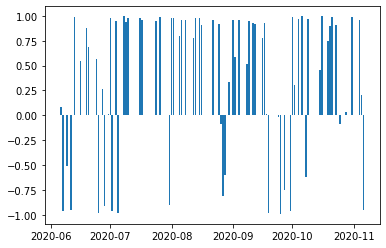

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
dateList = []
sent=[]
for date in date_sentiment:
    dateList.append(date)
    sent.append(date_sentiment[date])
plt.bar(dateList, sent)
